#  Singlet Scalar Dark Matter

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd #Series and DataFrames
import numpy as np #arrays
import os, sys, inspect
import commands
from hep import * 
import time

## Feynrules implementation
[Preliminary Analysis](../../../2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb)

See also full results with user galcen in fisica? or gfif?


## Check one point

In [4]:
a=hep(MODEL='SSDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [7]:
a.LHA.blocks['MINPAR'].entries

_dict([(1, '2.8000000E-01   # Lambda1IN'),
       (2, '1.0000000E-02   # LamSHIN'),
       (3, '0.0000000E+00   # LamSIN'),
       (4, '2.0000000E+02   # MSinput')])

Run one point

### Fix Higgs mass

In [9]:
v=a.vev
a.LHA.blocks['MINPAR'][2]='%0.8E       #LamhS' %60
a.LHA.blocks['MINPAR'][4]='%0.8E       #muS2' %60
moc=a.runmicromegas(Direct_Detection=True)
ap=a.branchings(a.LHA_out.decays,min_pdg=25) #Fill a.Br_names
a.Series['Mh']=a.LHA_out.blocks['MASS'][25]
a.Series['MS']=a.LHA_out.blocks['MASS'][6666635]
a.Series=a.Series.append(a.Br_names)
a.Series

GFFermiconstant     1.166370e-05
Zbosonpolemass      9.118870e+01
alphasMZSMMSbar     1.187000e-01
mbmbSMMSbar         4.180000e+00
mtaupole            1.776690e+00
mtoppole            1.735000e+02
LamSIN              0.000000e+00
Lambda1IN           2.800000e-01
LamhS               6.000000e+01
muS2                6.000000e+01
Mh                  1.302877e+02
MS                  1.907232e+03
h0 ->  SBAR S       1.806505e-04
h0 ->  DBAR D       5.022378e-07
h0 ->  W- W+        3.150397e-01
h0 ->  GLUE GLUE    8.048230e-02
h0 ->  PHOT PHOT    2.611523e-03
h0 ->  MU+ MU-      1.958746e-04
h0 ->  Z0 Z0        3.815280e-02
h0 ->  E+ E-        4.384726e-09
h0 ->  CBAR C       2.281859e-02
h0 ->  UBAR U       9.606354e-08
h0 ->  BBAR B       4.839731e-01
h0 ->  TAU+ TAU-    5.654484e-02
Gamma_ss            0.000000e+00
Gamma_h0            4.757755e-03
dtype: float64

## Scan $\lambda - m_{DM}$
Fig 1. of http://arxiv.org/pdf/1306.4710.pdf

Check also Fig. 1 of https://arxiv.org/pdf/1411.1335v2.pdf

In [11]:
print a.Series

GFFermiconstant     1.166370e-05
Zbosonpolemass      9.118870e+01
alphasMZSMMSbar     1.187000e-01
mbmbSMMSbar         4.180000e+00
mtaupole            1.776690e+00
mtoppole            1.735000e+02
LamSIN              0.000000e+00
Lambda1IN           2.800000e-01
LamhS               6.000000e+01
muS2                6.000000e+01
Mh                  1.302877e+02
MS                  1.907232e+03
h0 ->  SBAR S       1.806505e-04
h0 ->  DBAR D       5.022378e-07
h0 ->  W- W+        3.150397e-01
h0 ->  GLUE GLUE    8.048230e-02
h0 ->  PHOT PHOT    2.611523e-03
h0 ->  MU+ MU-      1.958746e-04
h0 ->  Z0 Z0        3.815280e-02
h0 ->  E+ E-        4.384726e-09
h0 ->  CBAR C       2.281859e-02
h0 ->  UBAR U       9.606354e-08
h0 ->  BBAR B       4.839731e-01
h0 ->  TAU+ TAU-    5.654484e-02
Gamma_ss            0.000000e+00
Gamma_h0            4.757755e-03
dtype: float64


In [12]:
start=time.time()
df=pd.DataFrame() #initialize empty dataframe
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
npoints=2
dm_masses=np.linspace(40,120,npoints)
LamSmin=1E-4;LamSmax=1
lambdas=np.logspace(np.log10(LamSmin),np.log10(LamSmax),npoints)
for MS in dm_masses:
    if np.where(dm_masses==MS)[0][0]%10==0: #find the index of the array entry
            print np.where(dm_masses==MS)[0][0]
    #muS2=int_to_phys(LamS,MS)
    muS2=MS #FIx!!!!
    #loop in LamS
    for LamS in lambdas:
        print muS2,LamS
        a.LHA.blocks['MINPAR'][2]='%0.8E       # LamhS' %LamS
        a.LHA.blocks['MINPAR'][4]='%0.8E       # muS2' %muS2
        a.runmicromegas(Direct_Detection=True)
        pa=a.branchings(a.LHA_out.decays,min_pdg=25) #Fill a.Br_names
        a.Series=a.Series.append(a.Br_names)
        a.Series['Mh']=a.LHA_out.blocks['MASS'][25]
        a.Series['MS']=a.LHA_out.blocks['MASS'][6666635]
        df=df.append(a.Series,ignore_index=True)
        df=df.fillna(0)
    
print time.time()-start

0
40.0 0.0001
40.0 1.0
120.0 0.0001
120.0 1.0
14.5702159405


In [13]:
df[:1]

,GFFermiconstant,Gamma_h0,Gamma_ss,LamSIN,Lambda1IN,LamhS,MS,Mh,Zbosonpolemass,alphasMZSMMSbar,...,h0 -> SBAR S,h0 -> TAU+ TAU-,h0 -> UBAR U,h0 -> W- W+,h0 -> Z0 Z0,h0 -> ss ss,mbmbSMMSbar,mtaupole,mtoppole,muS2
0,0.000012,0.004758,0.0,0.0,0.28,0.0001,6.786933,130.287679,91.1887,0.1187,...,0.000181,0.056543,9.605982e-08,0.315028,0.038151,0.000039,4.18,1.77669,173.5,40.0


### Relic density

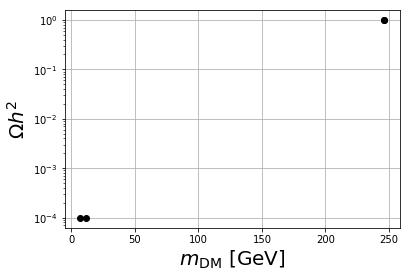

In [14]:
plt.semilogy(df.MS,df.LamhS,'ko')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()

In [18]:
df.columns.values

array(['GFFermiconstant', 'Gamma_h0', 'Gamma_ss', 'LamSIN', 'Lambda1IN',
       'LamhS', 'MS', 'Mh', 'Zbosonpolemass', 'alphasMZSMMSbar',
       'h0 ->  BBAR B', 'h0 ->  CBAR C', 'h0 ->  DBAR D', 'h0 ->  E+ E-',
       'h0 ->  GLUE GLUE', 'h0 ->  MU+ MU-', 'h0 ->  PHOT PHOT',
       'h0 ->  SBAR S', 'h0 ->  TAU+ TAU-', 'h0 ->  UBAR U',
       'h0 ->  W- W+', 'h0 ->  Z0 Z0', 'h0 ->  ss ss', 'mbmbSMMSbar',
       'mtaupole', 'mtoppole', 'muS2'], dtype=object)

In [ ]:
plt.semilogy(df.MS,df.neutron_SI,'k-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)